Here is the prompt I asked ChatGPT:"Can you write a Jupyter notebook which uses fastai to download cat and dog images to train a model to identify dogs and cats?"

I used ChatGPT for iOS 1.2024.206 (10172611049).

Here is ChatGPT's response to prompt (which I copied into this Jupyter Notebook).

In [1]:
# Sure! Below is a Jupyter notebook that uses fastai to download images of cats and dogs and trains a model to identify them.

# %% [markdown]
# # Cats vs Dogs Classifier using fastai
# 
# This notebook demonstrates how to use the fastai library to download images of cats and dogs, and train a model to distinguish between them.

# %%
# Install fastai if not already installed
!pip install -Uqq fastai 
#!pip install subscriptable_path #Added by me

# %%
from fastai.vision.all import *
from fastai.data.external import untar_data, URLs
#from subscriptable_path import Path  #Added by me

# %%
# Download the dataset
#path = untar_data(URLs.PETS)/'images' #Added by me
path = untar_data(URLs.PETS)
path

# %%
# The dataset has images and annotations. We only need the images.
# This call only lists the images in the images subdirectory.
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_265.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_182.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_89.jpg')...]

<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.Posi

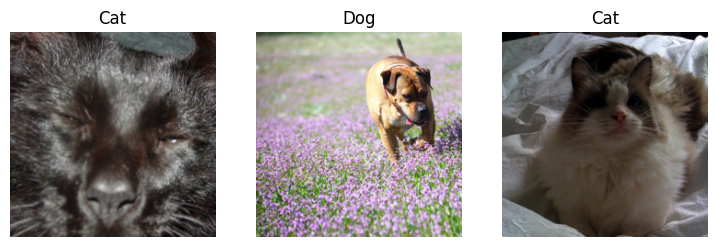

In [4]:
# %%
# The fastai library provides a convenient way to get labels from file names 
#     TypeError: 'PosixPath' object is not subscriptable caused by x[0]
#     X is a Path object and x[0] is returning "/" for every call
#     I would like to determine what gets passed into get_y function.  It seems to change per type of data block.
def is_cat(x): 
    if x.name[0].isupper():
        return "Cat"
    else:
        return "Dog"
    #return x.name[0].isupper() # Added this line
    #return x[0].isupper() #This does not work because a Path object is being sent as the input to the function

# %%
# Create a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Data types
    get_items=get_image_files,          # How to get the items
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Train/validation split
    get_y=is_cat,                       # How to get the labels
    item_tfms=Resize(460),              # Resize images to 460 pixels
    batch_tfms=aug_transforms(size=224, min_scale=0.75) # Data augmentation and resize to 224 pixels
)
dls = dblock.dataloaders(path/"images")

# Why is a string passed to is_cat function vs. a Path
#dls = ImageDataLoaders.from_name_func('.',
#    get_image_files(path), valid_pct=0.2, seed=42,
#    label_func=is_cat,
#    item_tfms=Resize(192))

# %%
# Show some examples
dls.show_batch(nrows=1, ncols=3)

In [ ]:
# %%
# Create a learner object and train the model
learn = vision_learner(dls, resnet34, metrics=error_rate)

# %%
# Fine-tune the model
#learn.fine_tune(4)
learn.fine_tune(2)

# %%
# Plot confusion matrix to see the results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# %%
# Show some misclassified images
interp.plot_top_losses(5, nrows=1)

# To use this notebook:
# 	1.	Make sure you have Jupyter Notebook or JupyterLab installed.
# 	2.	Save this notebook code into a .ipynb file.
# 	3.	Run the notebook. It will download the dataset, preprocess the images, train a ResNet34 model, and display the results.

# This notebook assumes you have a working Python environment with the fastai library
# installed. If not, you can install it by running !pip install -Uqq fastai in a Jupyter cell.